# Visualização Geoespacial do Saneamento no Estado do Pará

Este notebook apresenta a visualização dos dados de saneamento básico (água, esgoto e resíduos sólidos) nos municípios de Barcarena, Belém e Breves, destacando-os sobre o mapa do estado do Pará. Também é gerado um gráfico de barras comparando os três indicadores entre os municípios.

## Bibliotecas

In [24]:
import os
print("Diretório atual:", os.getcwd())

Diretório atual: c:\Users\Teambest\Desktop\matheus_meissner\dev\snis\scripts


In [25]:
# Importação de bibliotecas
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

## Tamanho Padrão

In [26]:
# Ajuste do tamanho padrão das figuras
plt.rcParams.update({'figure.figsize': (10, 6)})

## Define Caminhos para Arquivos de Dados

In [27]:
# Definição dos caminhos para os arquivos de dados
CAMINHO_PA = '../dados_shapefile/PA_Municipios_2022.shp'
CAMINHO_AGUA = '../dados_finais/agua.geojson'
CAMINHO_ESGOTO = '../dados_finais/esgoto.geojson'
CAMINHO_LIXO = '../dados_finais/lixo.geojson'

## Paleta de cores para os mapas

In [28]:
# Paleta de cores para os mapas
cmap_agua = 'Blues'
cmap_esgoto = 'Purples'
cmap_lixo = 'Greens'

## Plota o mapa do estado

In [29]:
# Função que plota o mapa do estado com destaque para os municípios com dados
def plot_mapa_com_estado(gdf_para, gdf_dados, coluna, titulo, cmap):
    fig, ax = plt.subplots(figsize=(12, 10))
    gdf_para.plot(ax=ax, color='#eeeeee', edgecolor='black', linewidth=0.5)
    gdf_dados.plot(column=coluna, cmap=cmap, edgecolor='black', linewidth=1, legend=True, ax=ax)
    for idx, row in gdf_dados.iterrows():
        x, y = row.geometry.centroid.coords[0]
        nome = row['municipio'].capitalize()
        valor = row[coluna]
        ax.text(x, y, f"{nome}\n{valor:.1f}%", ha='center', fontsize=9, weight='bold')
    ax.set_title(titulo, fontsize=16, pad=20)
    ax.axis('off')
    plt.tight_layout()
    plt.show()

## Gera gráfico de barras

In [30]:
# Função para gerar gráfico de barras comparativo entre os municípios
def plot_grafico_barra(gdfs, colunas, titulo):
    df = gdfs[0][['municipio', colunas[0]]].copy()
    df[colunas[1]] = gdfs[1][colunas[1]]
    df[colunas[2]] = gdfs[2][colunas[2]]
    df.set_index('municipio', inplace=True)
    df.plot(kind='bar')
    plt.title(titulo)
    plt.ylabel('% / Volume per capita')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

## Inicia Visualização

In [31]:
# Execução do pipeline de visualização
print('--- VISUALIZAÇÃO GEOGRÁFICA DO PARÁ + MUNICÍPIOS COM DADOS ---')

--- VISUALIZAÇÃO GEOGRÁFICA DO PARÁ + MUNICÍPIOS COM DADOS ---


## Carrega Dados geográficos

In [32]:
# Carregamento dos dados geográficos
gdf_para = gpd.read_file(CAMINHO_PA)
gdf_agua = gpd.read_file(CAMINHO_AGUA)
gdf_esgoto = gpd.read_file(CAMINHO_ESGOTO)
gdf_lixo = gpd.read_file(CAMINHO_LIXO)

## Normaliza nomes do municípios

In [33]:
# Normalização dos nomes dos municípios
gdf_para['NM_MUN'] = gdf_para['NM_MUN'].str.upper()
for gdf in [gdf_agua, gdf_esgoto, gdf_lixo]:
    gdf['municipio'] = gdf['municipio'].str.upper()


## Mapas

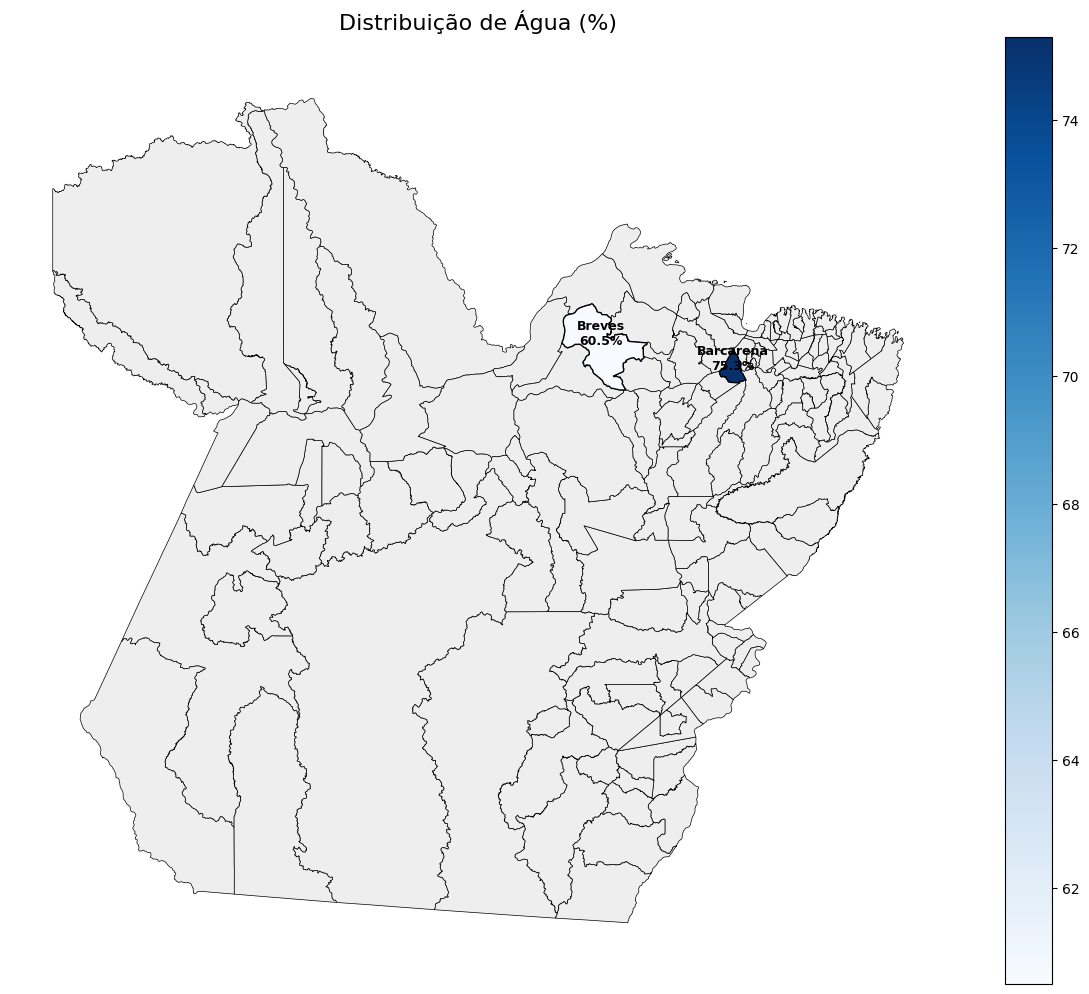

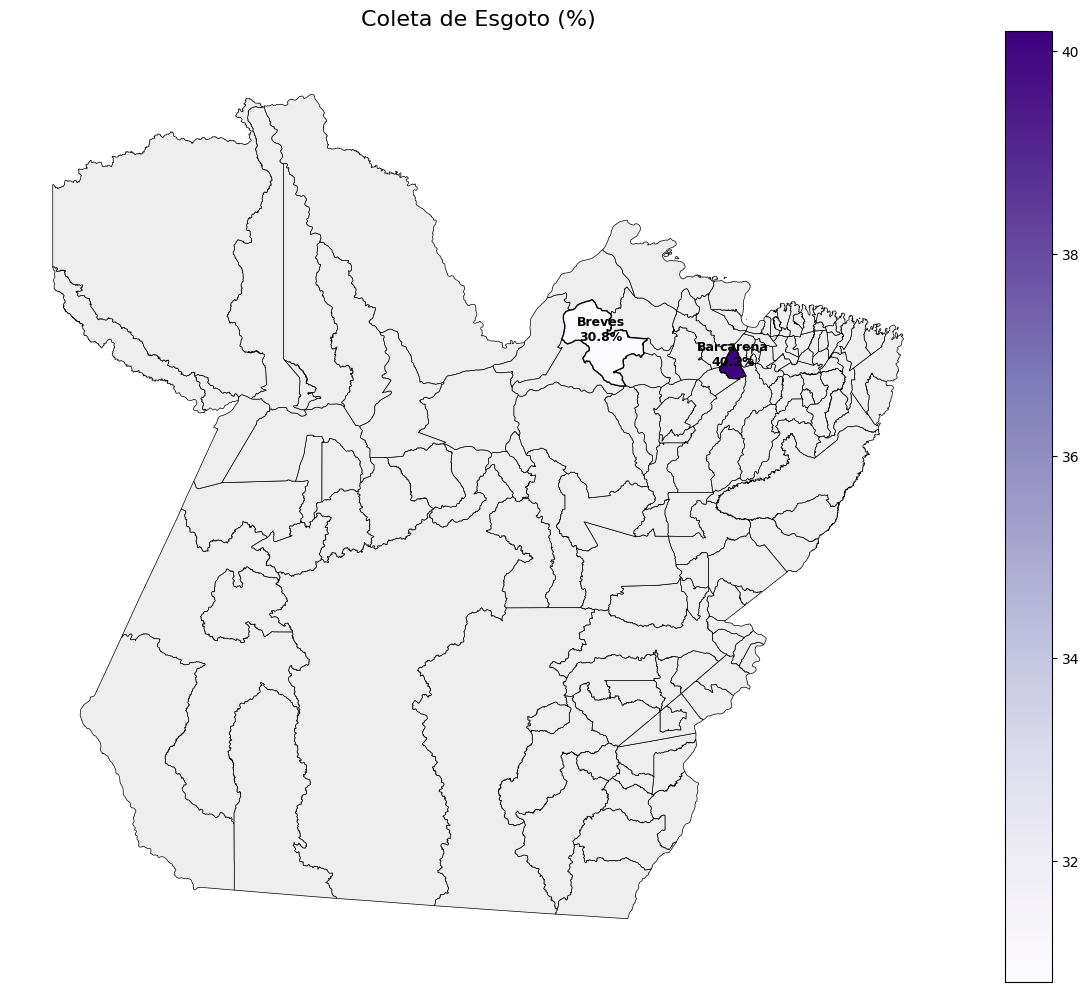

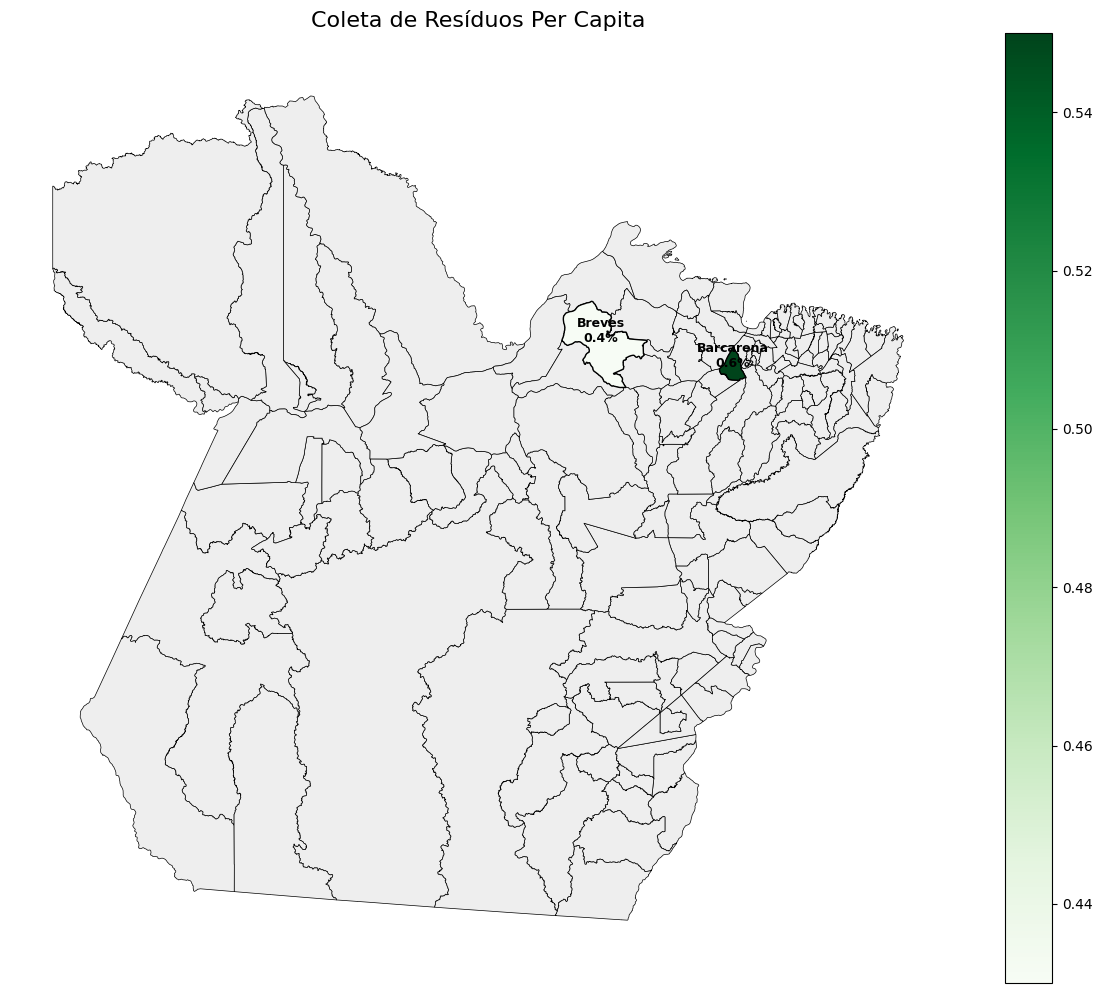

In [34]:
# Mapas
plot_mapa_com_estado(gdf_para, gdf_agua, 'agua_percentual', 'Distribuição de Água (%)', cmap_agua)
plot_mapa_com_estado(gdf_para, gdf_esgoto, 'esgoto_percentual', 'Coleta de Esgoto (%)', cmap_esgoto)
plot_mapa_com_estado(gdf_para, gdf_lixo, 'residuos_per_capita', 'Coleta de Resíduos Per Capita', cmap_lixo)

## Gráfico Comparativo

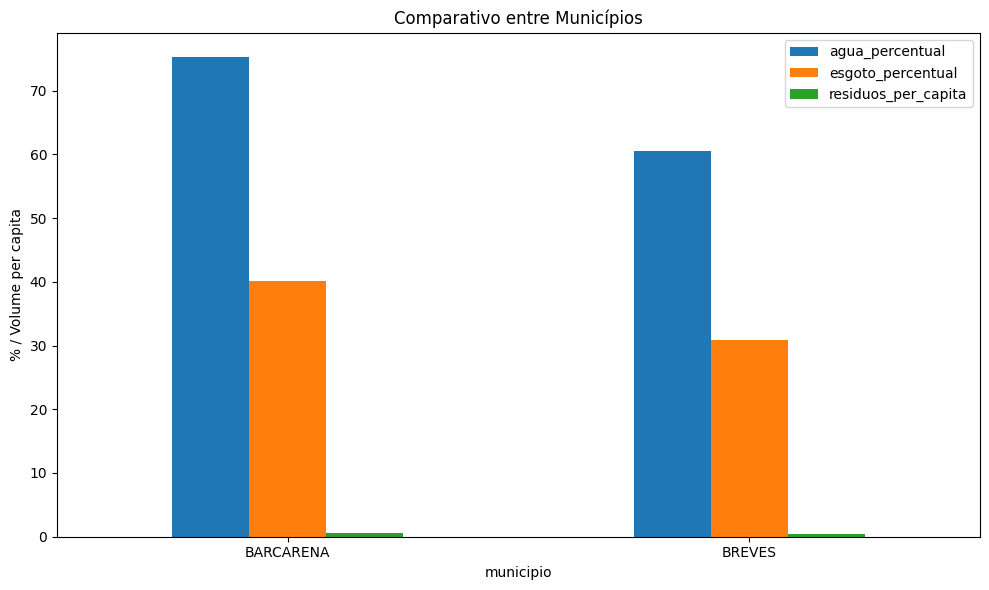

In [35]:
# Gráfico comparativo
plot_grafico_barra(
    [gdf_agua, gdf_esgoto, gdf_lixo],
    ['agua_percentual', 'esgoto_percentual', 'residuos_per_capita'],
    'Comparativo entre Municípios'
)

## Mensagem de êxito

In [36]:
print('[✓] Visualizações completas com fundo do Pará geradas com sucesso!')

[✓] Visualizações completas com fundo do Pará geradas com sucesso!
